In [4]:
#importing library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [5]:
#loading the dataset
df=pd.read_csv('../input/tipping/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
#checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Preprocessing

In [21]:
def preprocess_inputs(df):
    df=df.copy()
    #Binary encoding
    df['sex']=df['sex'].replace({'Male':1,'Female':0})
    df['smoker']=df['smoker'].replace({'Yes':1,'No':0})
    df['time']=df['time'].replace({'Lunch':0,'Dinner':1})
    #ordinal encoding
    df['day']=df['day'].replace({'Thur':0, 'Fri':1,'Sat':2,'Sun':3})
    
    return df

In [22]:
x=preprocess_inputs(df)
x

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3
240,27.18,2.00,0,1,2,1,2
241,22.67,2.00,1,1,2,1,2
242,17.82,1.75,1,0,2,1,2


# Exploratory Data Analysis

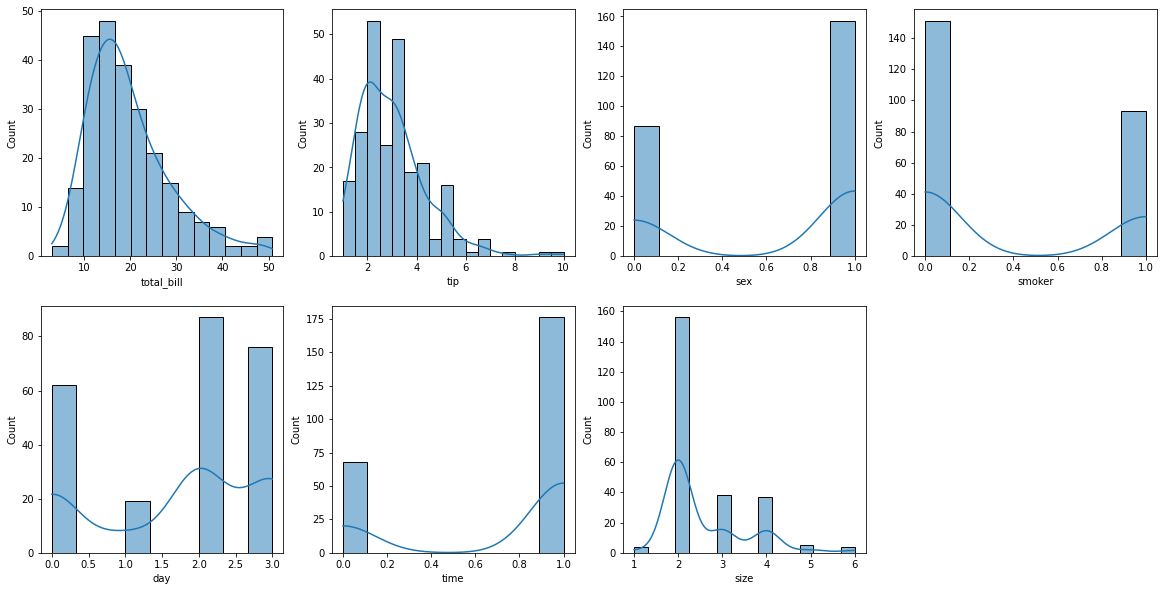

In [23]:
#creating histograms

plt.figure(figsize=(20,10))
#creating a loop through columns
for i in range(len(x.columns)):
    #2 rows and 4 histogram in each row
    plt.subplot(2,4,i+1)
    #creating a histograme x.columns[i] will give us the column name
    sns.histplot(x[x.columns[i]],kde=True)
    #showing the plot
plt.show()

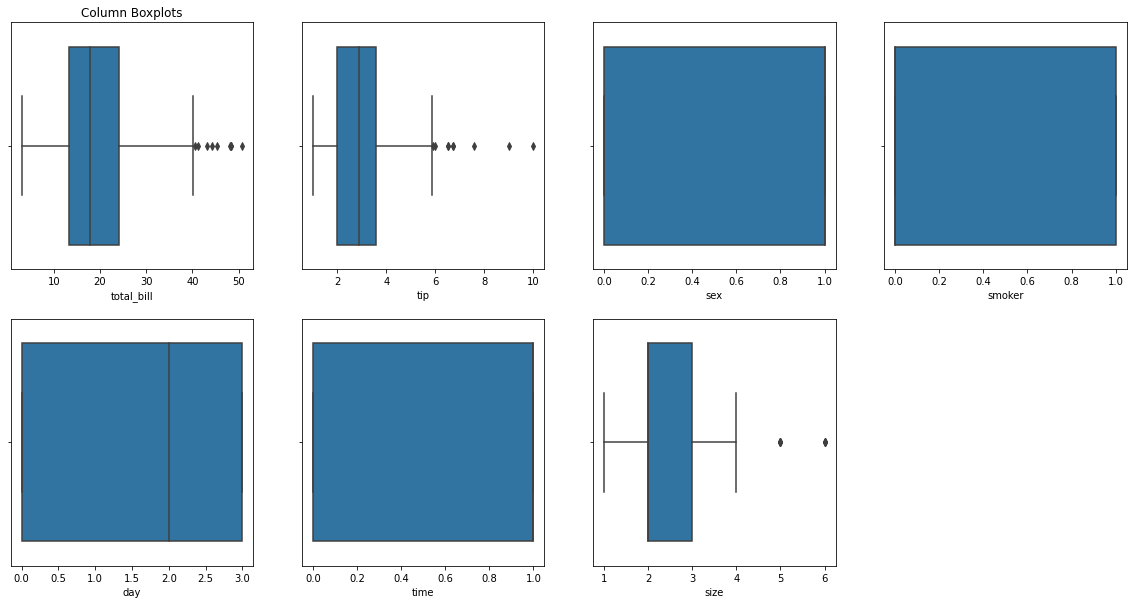

In [28]:
#creating boxplot
plt.figure(figsize=(20,10))
#creating a loop through columns
for i in range(len(x.columns)):
    #2 rows and 4 histogram in each row
    plt.subplot(2,4,i+1)
    #creating a boxplot x.columns[i] will give us the column name
    sns.boxplot(x=x[x.columns[i]])
    if i==0:
        plt.title('Column Boxplots')
    #showing the plot
plt.show()


In [10]:
#getting informatio about the unique value in each columns
{column:len(x[column].unique()) for column in x.columns}

{'total_bill': 229,
 'tip': 123,
 'sex': 2,
 'smoker': 2,
 'day': 4,
 'time': 2,
 'size': 6}

In [19]:
x['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

# Multi Variant Analysis

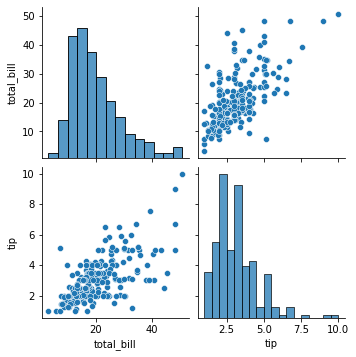

In [29]:
#creating pairplot
sns.pairplot(x.loc[:,['total_bill','tip']])

# Heatmap

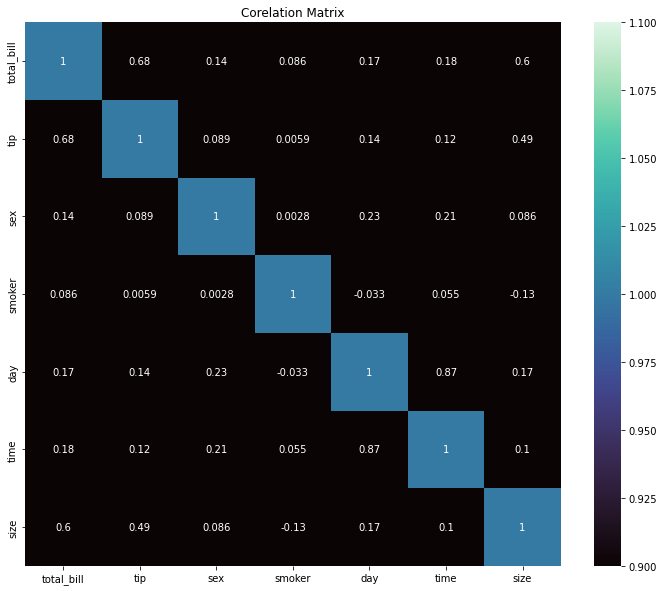

In [32]:
#creating heatmap
plt.figure(figsize=(12,10))
sns.heatmap(x.corr(),annot=True,vmin=1.0,cmap='mako')
plt.title('Corelation Matrix')
plt.show()

time and day are highly correlated it mean in weekend people takes dinner more often
size of the party and total_bill and tip goes up
as size of the party increases total_bill and tip increases

# Trainig 

In [33]:
#spliting the data between target and features and saving it
#to a variable
y=x['tip']
x=x.drop('tip',axis=1)


In [38]:
#kfold model to evaluate the model
#kfold takes different portion of dataset as test set and train set
result=[]
kf=KFold(n_splits=5)
for train_idx,test_idx in kf.split(x):
    x_train=x.iloc[train_idx,:]
    x_test=x.iloc[test_idx,:]
    y_train=y.iloc[train_idx]
    y_test=y.iloc[test_idx]
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),index=x_train.index,columns=x_train.columns)
    x_test=  pd.DataFrame(scaler.transform(x_test),index=x_test.index,columns=x.columns)
    model=LinearRegression()
    model.fit(x_train,y_train)
    result.append(model.score(x_test,y_test))

In [41]:
for i in range(len(result)):
    print('Fold{}:{:.2f}'.format(i+1,result[i]))
print('\nAverage R^2 Score: {:.2f}'.format(np.mean(result)))

Fold1:0.53
Fold2:0.60
Fold3:0.41
Fold4:0.21
Fold5:0.39

Average R^2 Score: 0.43
